In [30]:
!pip install git+https://github.com/RJT1990/pyflux

  Cloning https://github.com/RJT1990/pyflux to c:\users\user\appdata\local\temp\pip-req-build-bukwweyp


  Running command git clone -q https://github.com/RJT1990/pyflux 'C:\Users\User\AppData\Local\Temp\pip-req-build-bukwweyp'
You should consider upgrading via the 'C:\Users\User\AppData\Roaming\JetBrains\DataSpell2021.3\projects\workspace\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [31]:

import util
import eval
import numpy as np
import pyflux as pf
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series

In [32]:
p = 1
q = 1
h_test = 6

ts, data = util.load_data("EUR-USD.csv", columnName="rate")

time series shape: (5816, 1)


In [33]:
train, test = util.divideTrainTest(data)
train = train[:1000]
test = test[:14]
print("train shape is", train.shape)
print("test shape is", test.shape)
history = [x[0] for x in train]
predictions = []
realTestY = []

train shape is (1000, 1)
test shape is (14, 1)


In [34]:
for t in range(len(test) - h_test):
    model = pf.ARIMA(data=np.array(history), ar=p, ma=q, family=pf.Normal())
    model.fit(method="MLE")

    output = model.predict(h_test, intervals=False)

    yhat = output.values.flatten().tolist()

    obs = test[t : t + h_test].flatten()

    realTestY.append(obs)
    predictions.append(yhat)
    history.extend(test[t])
    print("t:", t+1)
    print("predict:", yhat)
    print('expected:', obs)

t: 1
predict: [1.1668179867695778, 1.1617216338303644, 1.1612380853843234, 1.1611922056930113, 1.1611878525695711, 1.1611874395396848]
expected: [1.2079 1.2071 1.2175 1.2172 1.2168 1.2111]
t: 2
predict: [1.1743946606566569, 1.162496402580969, 1.161358685704015, 1.1612498966960887, 1.1612394942414135, 1.1612384995539418]
expected: [1.2071 1.2175 1.2172 1.2168 1.2111 1.2047]
t: 3
predict: [1.1727125241880292, 1.1623877379742442, 1.1613864250515504, 1.1612893162544875, 1.161279898500803, 1.1612789851532264]
expected: [1.2175 1.2172 1.2168 1.2111 1.2047 1.2085]
t: 4
predict: [1.1768948388907214, 1.162892568385956, 1.1614828272247408, 1.1613408952330009, 1.1613266055954181, 1.1613251669222922]
expected: [1.2172 1.2168 1.2111 1.2047 1.2085 1.21  ]
t: 5
predict: [1.176464908096519, 1.1629572700625215, 1.161539721774759, 1.161390958301598, 1.1613753464376932, 1.1613737080631017]
expected: [1.2168 1.2111 1.2047 1.2085 1.21   1.2081]
t: 6
predict: [1.1771222433688708, 1.163143816400474, 1.161615

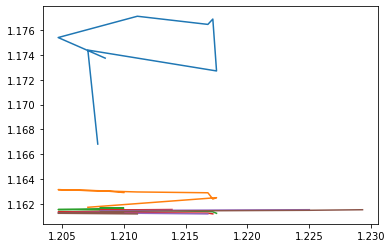

In [37]:
realTestY = np.array(realTestY).reshape(-1, h_test)
predictions = np.array(predictions).reshape(-1, h_test)
plt.plot(realTestY,predictions)

In [ ]:
MAE = eval.calcMAE(realTestY, predictions)
RMSE = eval.calcRMSE(realTestY, predictions)
MAPE = eval.calcSMAPE(realTestY, predictions)
print('Test MAE: %.8f' % MAE)
print('Test RMSE: %.8f' % RMSE)
print('Test SMAPE: %.8f' % MAPE)